In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
pd.set_option('display.float_format',lambda x: '{: .3f}' .format(x))
np.set_printoptions(suppress=True)

In [83]:
df_customers = pd.read_csv('customers.csv')
df_loans = pd.read_csv('loans.csv')
df_bureau = pd.read_csv('bureau_data.csv')

In [84]:
df_customers.shape, df_loans.shape,df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [85]:
df_customers.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001


In [86]:
df_loans.head(2)

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.000,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.000,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False


### Merge the Dataframes

In [87]:
df = pd.merge(df_customers,df_loans,on = 'cust_id')
df.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.000,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.000,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False


In [88]:
df = pd.merge(df,df_bureau,on='cust_id')
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [90]:
df.default = df.default.astype(int)
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,0,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,0,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,0,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,0,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,0,4,2,120,0,0,5,10


In [91]:
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

##### we can see class imbalance

### Split into train and test datasets

In [92]:
from sklearn.model_selection import train_test_split 

X = df.drop('default',axis=1)
y = df.default

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

In [93]:
df_train = pd.concat([X_train,y_train],axis=1)
df_test = pd.concat([X_test,y_test],axis=1)

print(df_train.shape,df_test.shape)
df_train.head()

(37500, 33) (12500, 33)


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-11-12,2020-12-07,1,2,60,0,0,1,71,0


<h2 align = 'center' style='color:blue'> Data Cleaning </h2>

### Treat NA values

In [94]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [95]:
resident_type_mode = df_train.residence_type.mode()[0]
resident_type_mode

'Owned'

In [96]:
df_train.residence_type.fillna(resident_type_mode,inplace=True)

C:\Users\shravan pattan\AppData\Local\Temp\ipykernel_2212\544443146.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(resident_type_mode,inplace=True)


In [97]:
df_train.isna().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [98]:
df_test.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 15
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

##### apply same step to test data as well

In [99]:
df_test.residence_type.fillna(resident_type_mode,inplace=True)

C:\Users\shravan pattan\AppData\Local\Temp\ipykernel_2212\1626107016.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(resident_type_mode,inplace=True)


In [100]:
df_test.isna().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [101]:
df_train.duplicated().sum(), df_test.duplicated().sum()

np.int64(0)

In [102]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [103]:
continuous_columns = df_train.select_dtypes(['float64','int64']).columns
continuous_columns

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [104]:
continuous_columns = continuous_columns.drop(['default','zipcode'])

In [105]:
categorical_columns = df_train.columns.drop(continuous_columns)
categorical_columns

Index(['cust_id', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'zipcode', 'loan_id', 'loan_purpose',
       'loan_type', 'disbursal_date', 'installment_start_dt', 'default'],
      dtype='object')

In [106]:
categorical_columns = categorical_columns.drop(['cust_id','loan_id','disbursal_date','installment_start_dt'])
categorical_columns

Index(['gender', 'marital_status', 'employment_status', 'residence_type',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type', 'default'],
      dtype='object')

### Visualize the data

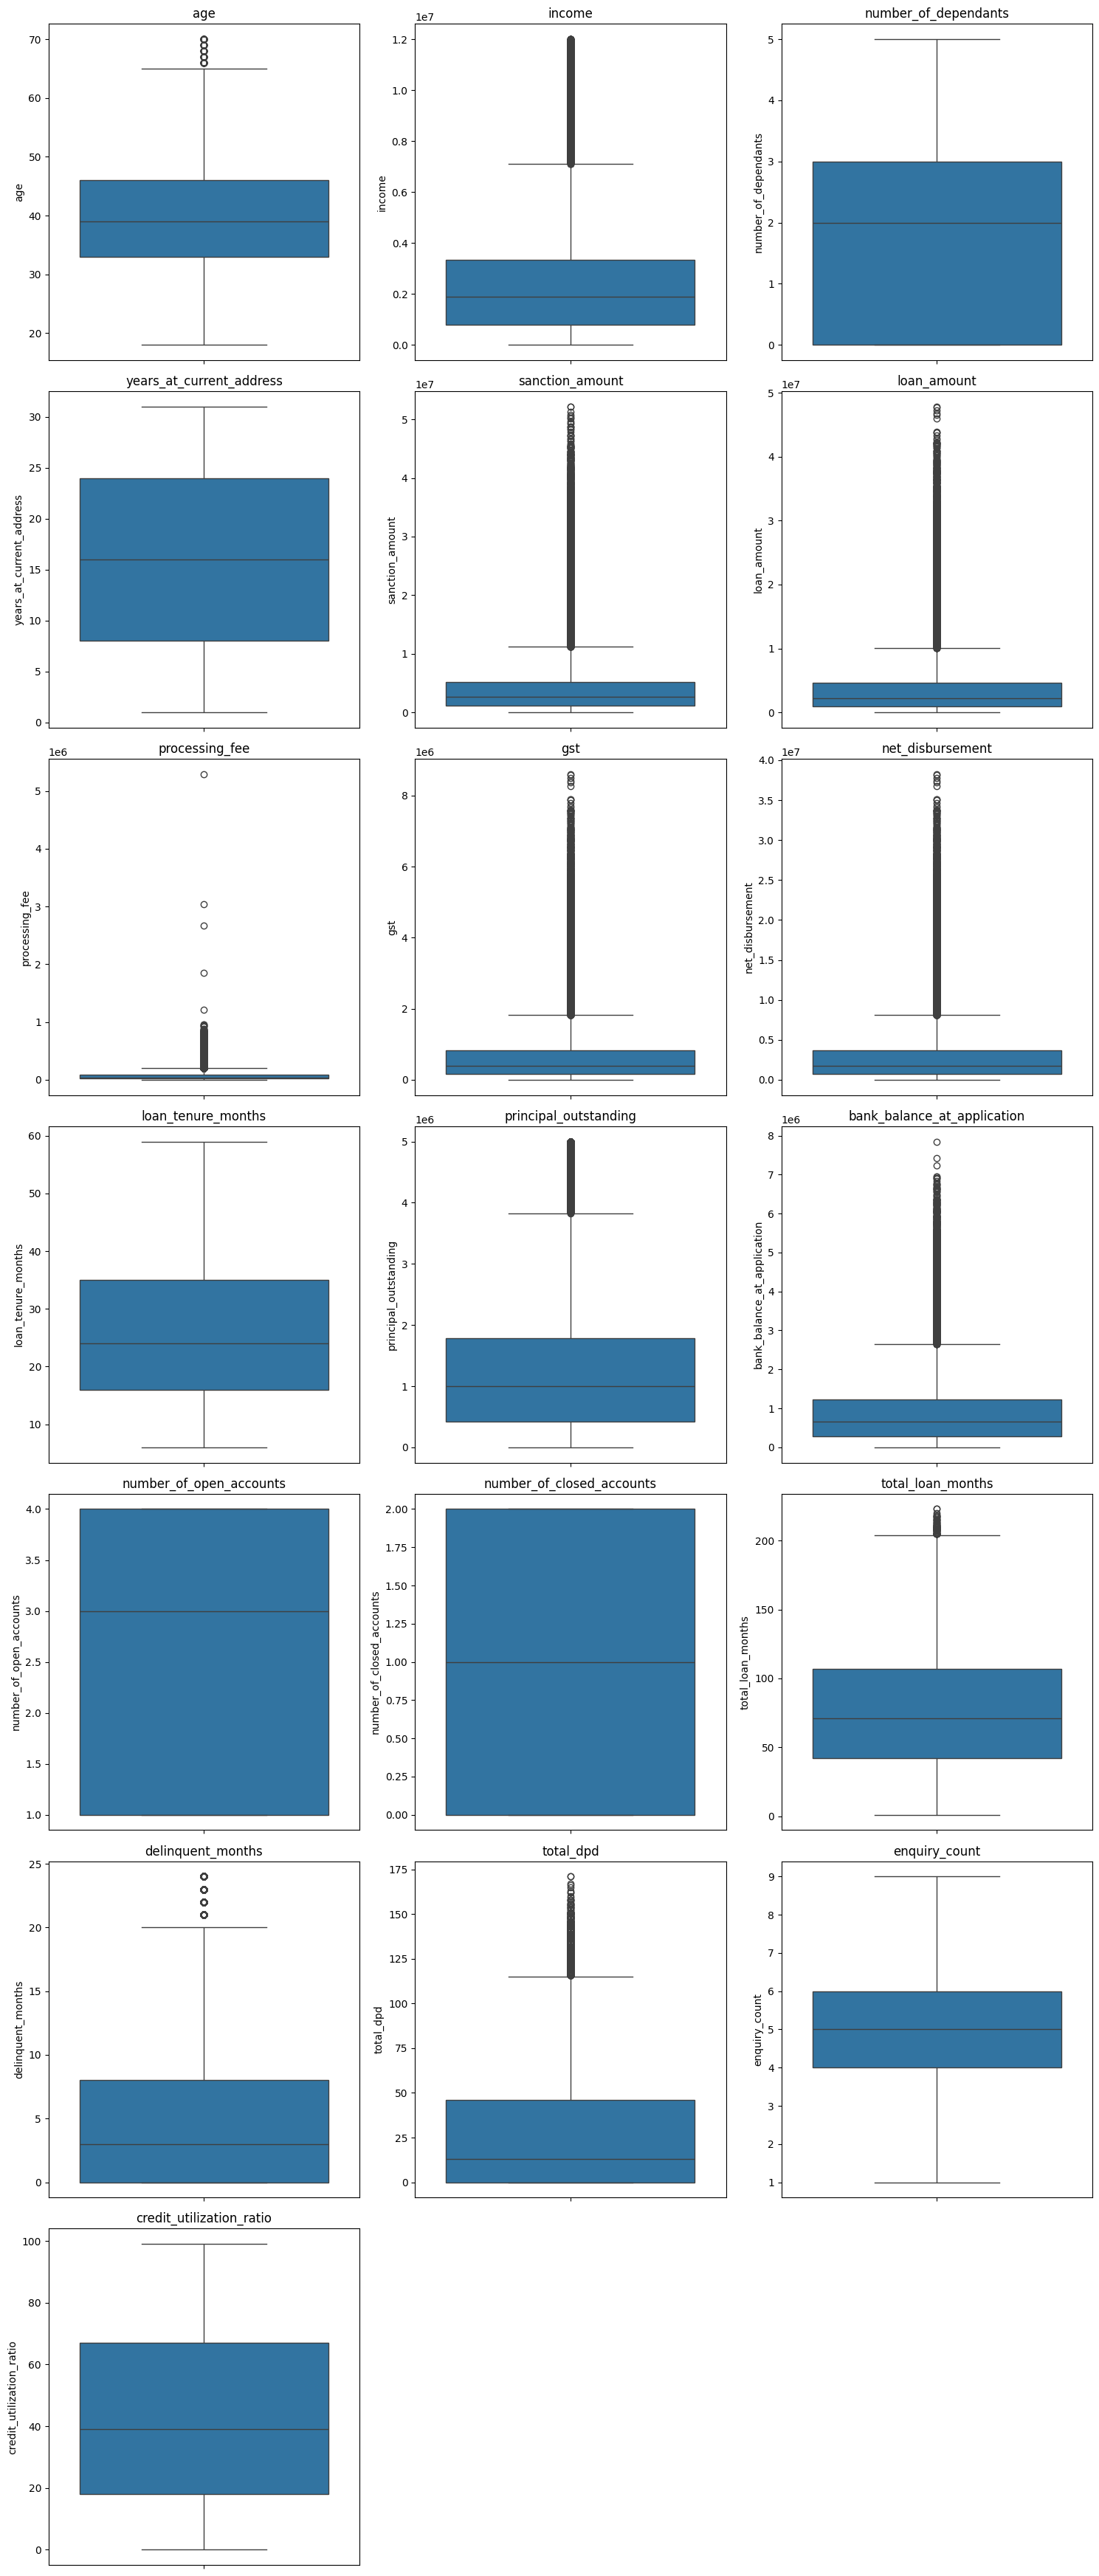

In [107]:
# Calculate required number of rows
num_cols = 3  # 3 columns per row
num_rows = int(np.ceil(len(continuous_columns) / num_cols))  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))  # Adjust size
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot each boxplot in its respective subplot
for i, col in enumerate(continuous_columns):
    sns.boxplot(data=df_train[col], ax=axes[i])
    axes[i].set_title(col)

# Remove any empty subplots (if continuous_columns is not a multiple of 3)
for i in range(len(continuous_columns), num_rows * num_cols):
    fig.delaxes(axes[i])  # Remove unused axes

plt.tight_layout()  # Adjust layout
plt.show()

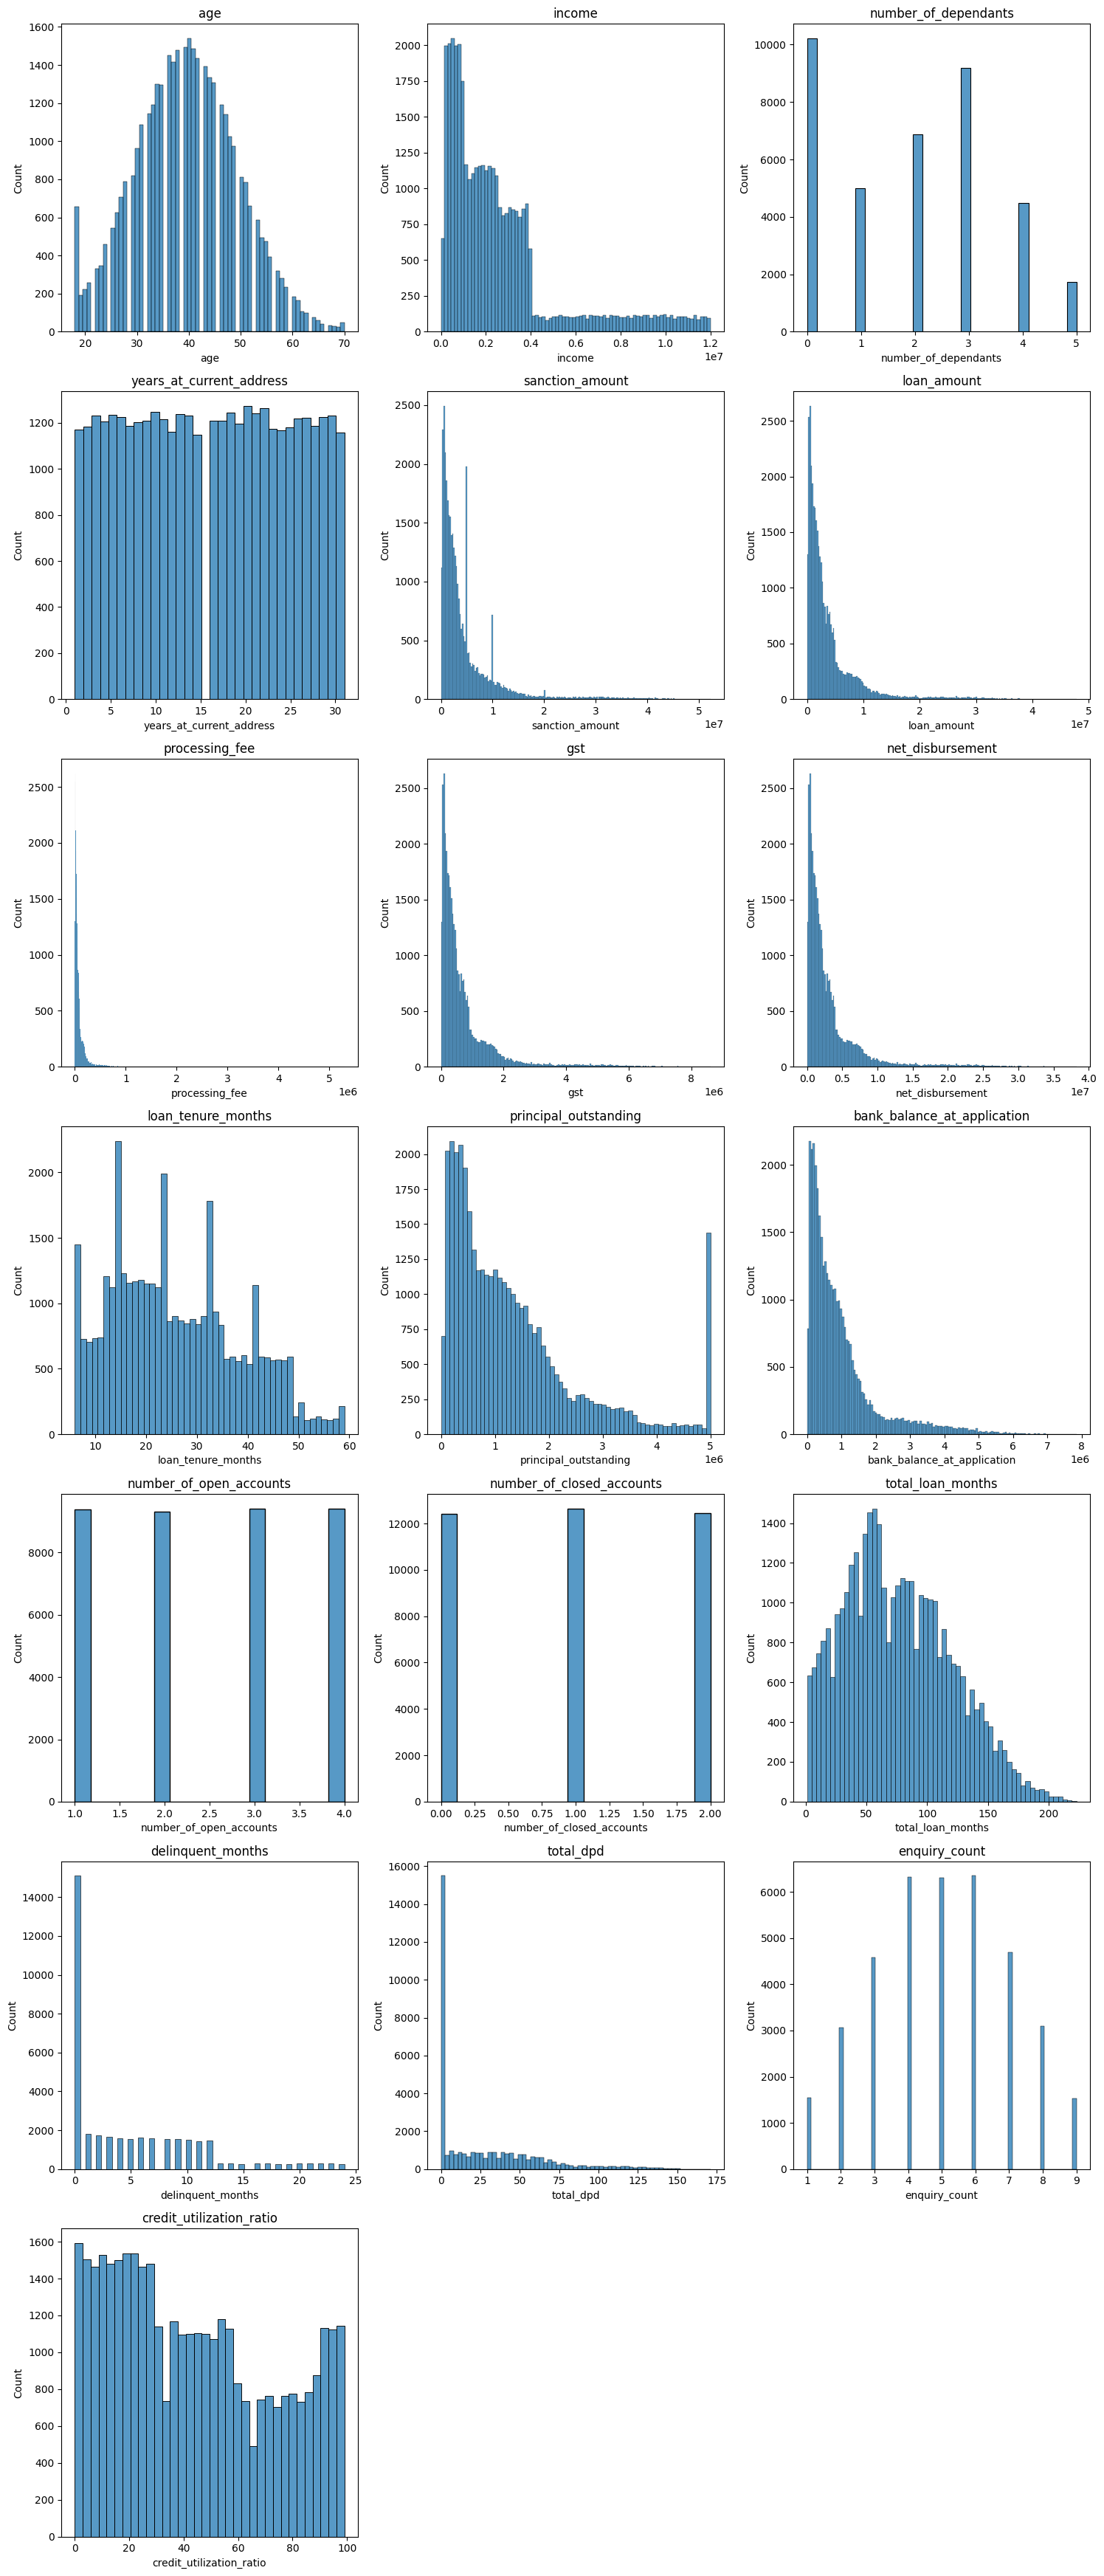

In [108]:
# Calculate required number of rows
num_cols = 3  # 3 columns per row
num_rows = int(np.ceil(len(continuous_columns) / num_cols))  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))  # Adjust size
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot each boxplot in its respective subplot
for i, col in enumerate(continuous_columns):
    sns.histplot(data=df_train[col], ax=axes[i])
    axes[i].set_title(col)

# Remove any empty subplots (if continuous_columns is not a multiple of 3)
for i in range(len(continuous_columns), num_rows * num_cols):
    fig.delaxes(axes[i])  # Remove unused axes

plt.tight_layout()  # Adjust layout
plt.show()

In [109]:
df_train.processing_fee.describe()

count      37500.000
mean       80290.677
std       113128.140
min            0.000
25%        19220.000
50%        44600.000
75%        92420.000
max      5293543.524
Name: processing_fee, dtype: float64

In [110]:
df_train[df_train.processing_fee>df_train.loan_amount][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.023
28174,966000,1214492.673
47089,1738000,1858964.768
29305,2616000,3036378.005
9898,3626000,5293543.524


##### these are outliers as processing_fee cant be > than loan_amount
##### we will go with the assumption that processing fee cant be greater than 3% of the loan amount

In [111]:
df_train[df_train.processing_fee/df_train.loan_amount>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.023
28174,966000,1214492.673
47089,1738000,1858964.768
29305,2616000,3036378.005
9898,3626000,5293543.524


##### hence these are outliers, i plan to drop them as there are only 5 records

In [112]:
df_train_1 = df_train[df_train.processing_fee/df_train.loan_amount<=0.03].copy()
df_train_1

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-11-12,2020-12-07,1,2,60,0,0,1,71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,C28516,70,M,Single,Self-Employed,2470000,0,Owned,20,Kolkata,...,2022-05-30,2022-06-09,2,0,40,0,0,5,13,0
5558,C05559,39,F,Single,Salaried,2472000,0,Rented,26,Kolkata,...,2020-02-12,2020-02-17,1,0,52,14,72,4,44,0
45236,C45237,39,M,Married,Self-Employed,1329000,4,Owned,10,Pune,...,2024-01-30,2024-02-04,4,2,130,11,44,6,97,1
49228,C49229,33,M,Single,Salaried,1274000,2,Owned,26,Chennai,...,2024-06-24,2024-07-21,2,1,88,0,0,6,25,0


##### apply for test dataset as well

In [113]:
df_test = df_test[df_test.processing_fee/df_test.loan_amount<=0.03].copy()
df_test.shape

(12497, 33)

In [114]:
for col in categorical_columns:
    print(col,'---|',df_train_1[col].unique())

gender ---| ['M' 'F']
marital_status ---| ['Married' 'Single']
employment_status ---| ['Self-Employed' 'Salaried']
residence_type ---| ['Owned' 'Mortgage' 'Rented']
city ---| ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state ---| ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode ---| [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose ---| ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type ---| ['Secured' 'Unsecured']
default ---| [0 1]


In [115]:
df_train_1.loan_purpose = df_train_1.loan_purpose.replace('Personaal','Personal')

In [116]:
df_train_1.loan_purpose.unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

##### apply for test dataset as well

In [117]:
df_test.loan_purpose = df_test.loan_purpose.replace('Personaal','Personal')

In [118]:
#Assuming gst should be less than 20%
df_train_1[(df_train_1.gst/df_train_1.loan_amount)>0.2]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


In [119]:
#Sanction amt shld be > loan amount
df_train_1[df_train_1.sanction_amount<df_train_1.loan_amount]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


<h2 align = 'center' style='color:blue'> Exploratory Data Analysis </h2>

In [120]:
continuous_columns

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio'],
      dtype='object')

### Bivariate Analysis

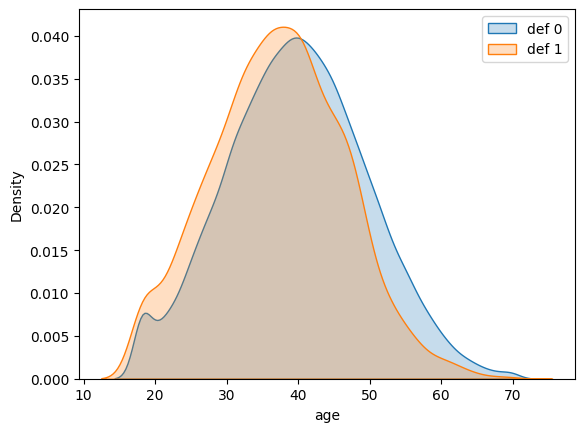

In [121]:
sns.kdeplot(df_train_1[df_train_1.default==0]['age'],fill=True, label='def 0')
sns.kdeplot(df_train_1[df_train_1.default==1]['age'],fill=True, label='def 1')
plt.legend()
plt.show()

##### this shows young ppl are more likely to default

In [122]:
continuous_columns.shape

(19,)

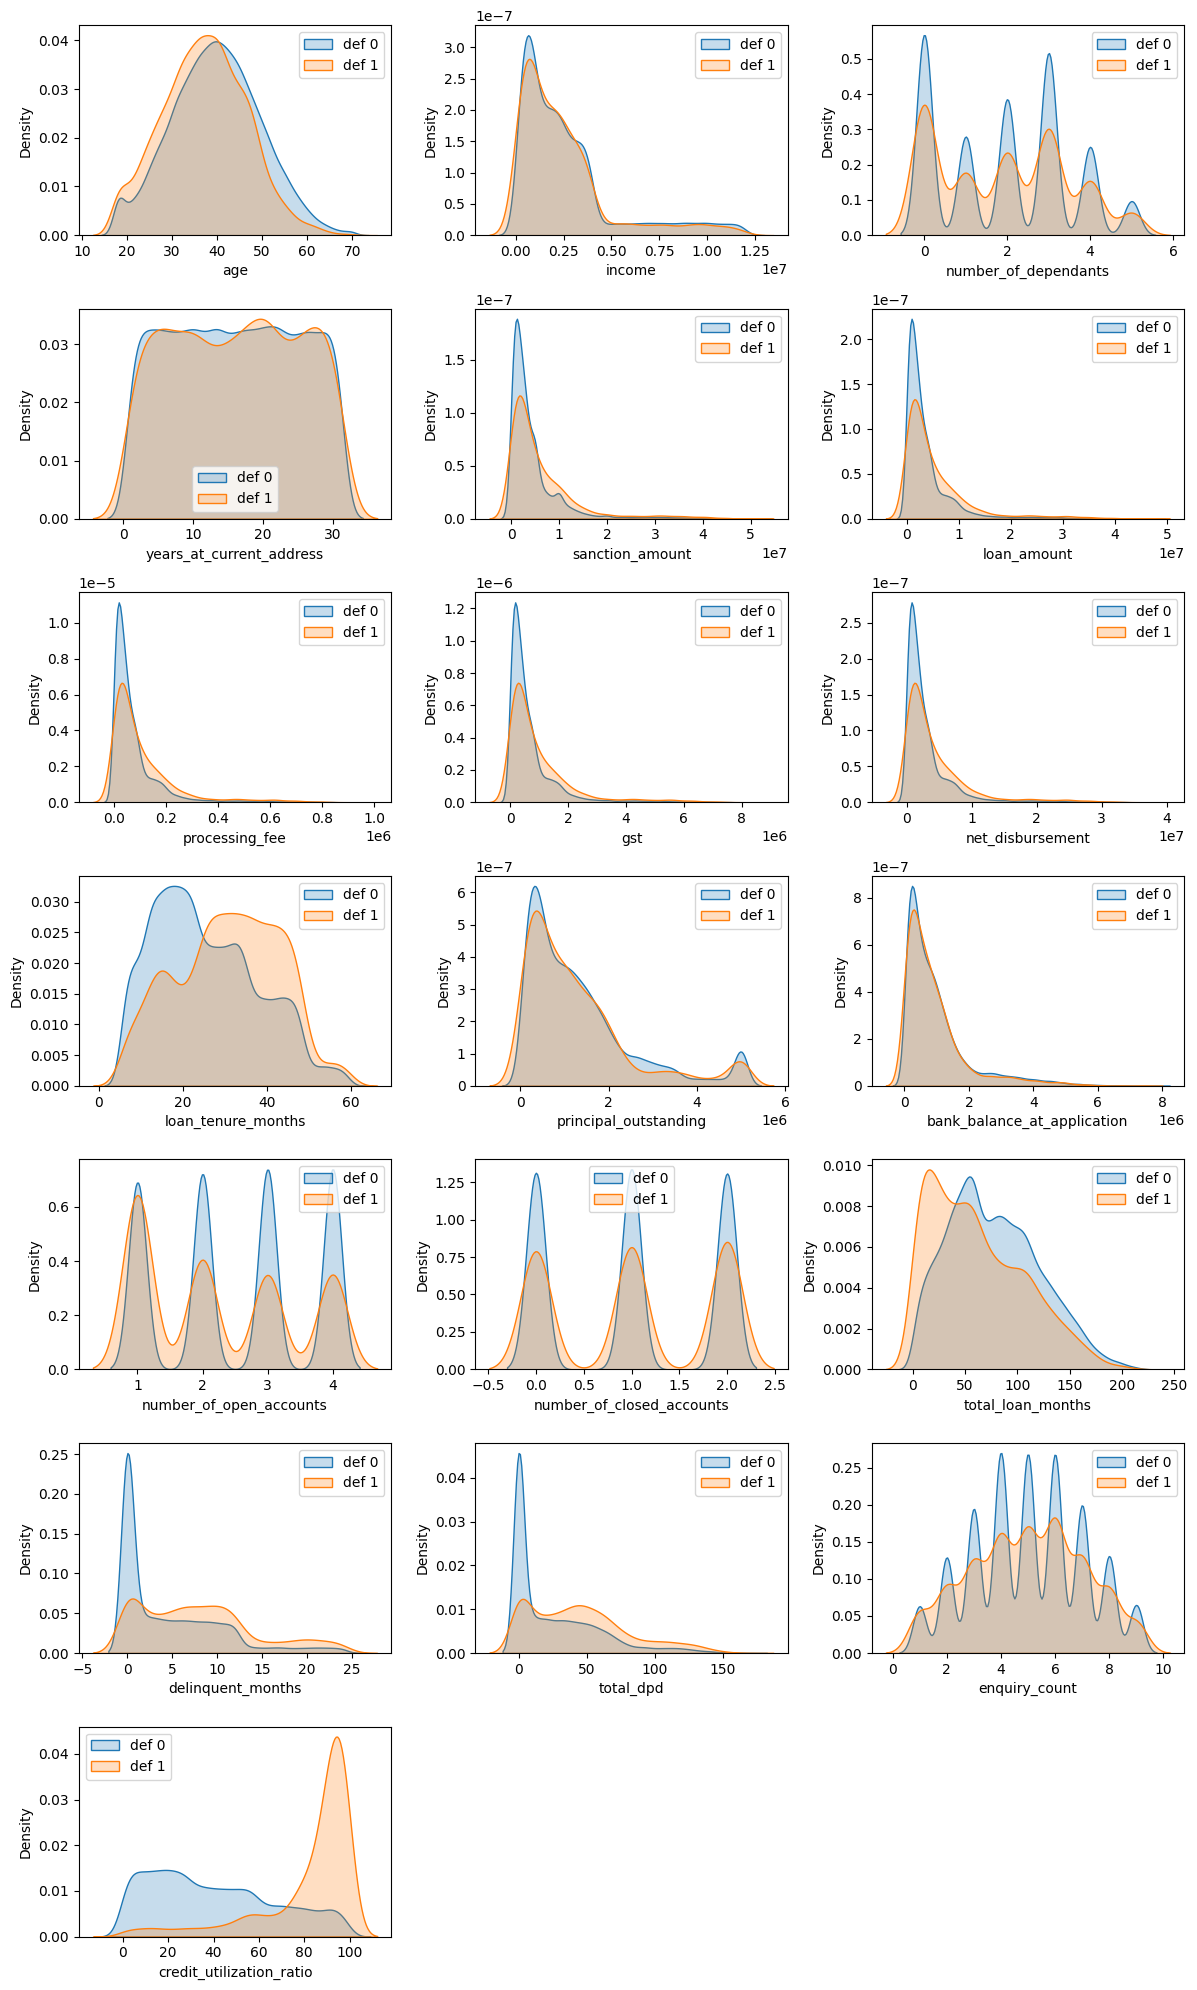

In [123]:
plt.figure(figsize = (12,20))

for i,col in enumerate(continuous_columns):
    plt.subplot(7,3,i+1)
    sns.kdeplot(df_train_1[df_train_1.default==0][col],fill=True, label='def 0')
    sns.kdeplot(df_train_1[df_train_1.default==1][col],fill=True, label='def 1')
    plt.legend()
plt.tight_layout()    
plt.show()

Insights
1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
2. In remaining columns the distributions do not give any obvious insights.
3. Why loan amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI) that may have influence on the target variable. We will explore more later

<h2 align = 'center' style='color:blue'> Feature Engineering </h2>

#### Loan to Income ratio

In [124]:
df_train_1['loan_to_income_ratio'] = round(df_train_1['loan_amount']/df_train_1['income'],2)
df_train_1.loan_to_income_ratio.describe()

count    37488.000
mean         1.557
std          0.974
min          0.300
25%          0.770
50%          1.160
75%          2.460
max          4.570
Name: loan_to_income_ratio, dtype: float64

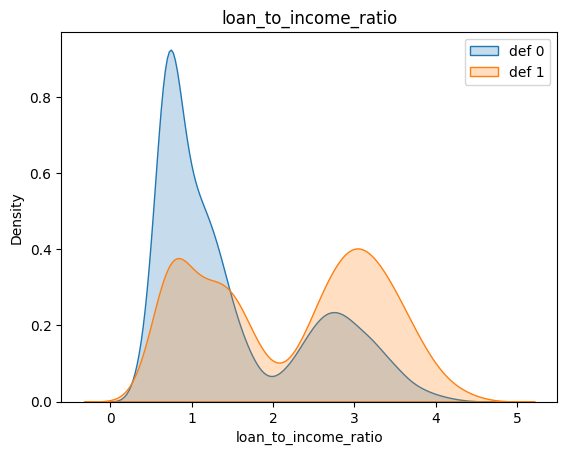

In [125]:
sns.kdeplot(df_train_1[df_train_1.default==0]['loan_to_income_ratio'],fill=True, label='def 0')
sns.kdeplot(df_train_1[df_train_1.default==1]['loan_to_income_ratio'],fill=True, label='def 1')
plt.title('loan_to_income_ratio')
plt.legend()
plt.show()

##### so customers with less LTI ration are less likely to default

##### apply to test dataset as well

In [126]:
df_test['loan_to_income_ratio'] = round(df_test['loan_amount']/df_test['income'],2)

#### Delinquent months to loan months ratio

In [127]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income_ratio'],
      dtype='object')

In [128]:
df_train_1['delinquency_ratio'] = round(df_train_1['delinquent_months']/df_train_1['total_loan_months'],2)
df_train_1[['delinquent_months','total_loan_months','delinquency_ratio']].head()

,delinquent_months,total_loan_months,delinquency_ratio
12746,20,152,0.130
32495,10,160,0.060
43675,12,54,0.220
9040,0,76,0.000
13077,0,60,0.000


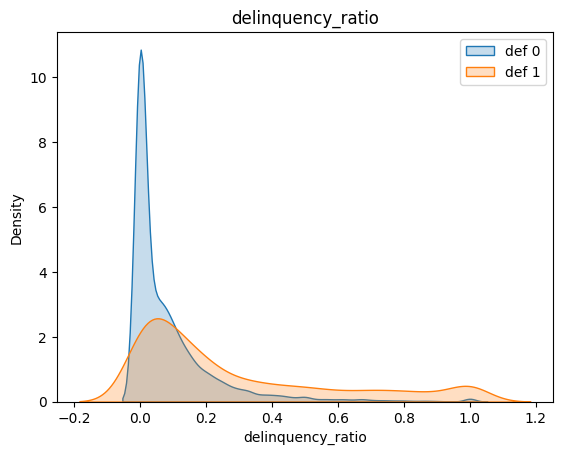

In [129]:
sns.kdeplot(df_train_1[df_train_1.default==0]['delinquency_ratio'],fill=True, label='def 0')
sns.kdeplot(df_train_1[df_train_1.default==1]['delinquency_ratio'],fill=True, label='def 1')
plt.title('delinquency_ratio')
plt.legend()
plt.show()

##### apply to test dataset as well

In [130]:
df_test['delinquency_ratio'] = round(df_test['delinquent_months']/df_test['total_loan_months'],2)

#### avg Days Past Due(DPD) per Delinquency month

In [131]:
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    round(df_train_1['total_dpd']/df_train_1['delinquent_months'],2),
    0)
df_train_1['avg_dpd_per_delinquency'].describe()

count    37488.000
mean         3.284
std          2.907
min          0.000
25%          0.000
50%          4.330
75%          5.742
max         10.000
Name: avg_dpd_per_delinquency, dtype: float64

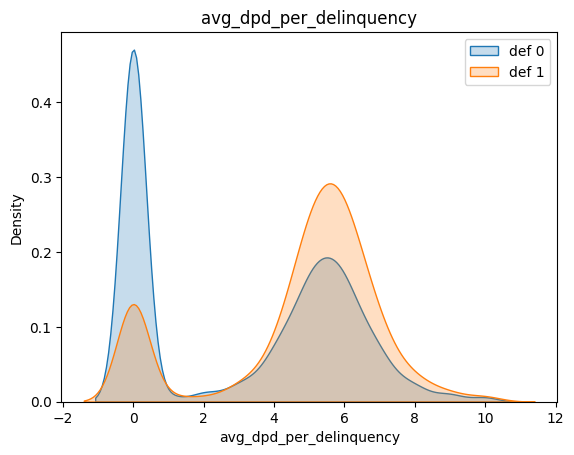

In [132]:
sns.kdeplot(df_train_1[df_train_1.default==0]['avg_dpd_per_delinquency'],fill=True, label='def 0')
sns.kdeplot(df_train_1[df_train_1.default==1]['avg_dpd_per_delinquency'],fill=True, label='def 1')
plt.title('avg_dpd_per_delinquency')
plt.legend()
plt.show()

##### so customers with higher avg_dpd_per_delinquency are more likely to default

##### apply to the test dataset as well

In [133]:
df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months'] != 0,
    round(df_test['total_dpd']/df_test['delinquent_months'],2),
    0)
df_test['avg_dpd_per_delinquency'].describe()

count    12497.000
mean         3.339
std          2.897
min          0.000
25%          0.000
50%          4.400
75%          5.750
max         10.000
Name: avg_dpd_per_delinquency, dtype: float64

In [134]:
print(df_train_1.shape)
df_train_1.columns

(37488, 36)


Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income_ratio', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

### Feature Selection 

##### we drop columns like the unique identifiers which do not contribute for the model

In [135]:
df_train_2 = df_train_1.drop(['cust_id','loan_id'],axis=1)
df_train_2.shape

(37488, 34)

In [136]:
df_test = df_test.drop(['cust_id','loan_id'],axis=1)

In [137]:
df_test.shape

(12497, 34)

##### Since we have derived features such as loan-to-income ratio, delinquency ratio, and average DPD per delinquency, the original columns used to compute them are now redundant and can be dropped.

In [138]:
df_train_3 = df_train_2.drop(['disbursal_date','installment_start_dt','loan_amount',
                              'income','total_loan_months','delinquent_months',
                              'total_dpd'],axis=1)
print(df_train_3.shape)
df_train_3.columns

(37488, 27)


Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income_ratio',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

##### do for the test dataset as well

In [139]:
df_test = df_test.drop(['disbursal_date','installment_start_dt','loan_amount',
                              'income','total_loan_months','delinquent_months',
                              'total_dpd'],axis=1)
df_test.shape

(12497, 27)

#### Multicolinearity Analysis

In [140]:
df_train_3['zipcode'] = df_train_3['zipcode'].astype('object')
df_test['zipcode'] = df_test['zipcode'].astype('object')
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  int64  
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  int64  
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  int64  
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  object 
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  sanction_amount              37488 non-null  int64  
 13  processing_fee   

In [141]:
num_cols = df_train_3.select_dtypes(['int64','float64']).columns
num_cols

Index(['age', 'number_of_dependants', 'years_at_current_address',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income_ratio',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [142]:
cols_to_scale = num_cols.drop(['default'])
cols_to_scale 

Index(['age', 'number_of_dependants', 'years_at_current_address',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [143]:
X_train = df_train_3.drop('default',axis=1)
y_train = df_train_3.default

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income_ratio,delinquency_ratio,avg_dpd_per_delinquency
count,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000,37488.000
mean,0.414,0.389,0.500,0.089,0.083,0.083,0.083,0.377,0.262,0.124,0.501,0.501,0.501,0.439,0.294,0.103,0.328
std,0.190,0.307,0.297,0.120,0.112,0.112,0.112,0.235,0.244,0.133,0.373,0.407,0.254,0.297,0.228,0.173,0.291
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.288,0.000,0.233,0.021,0.019,0.019,0.019,0.189,0.078,0.034,0.000,0.000,0.375,0.182,0.110,0.000,0.000
50%,0.404,0.400,0.500,0.049,0.046,0.046,0.046,0.340,0.194,0.083,0.667,0.500,0.500,0.394,0.201,0.040,0.433
75%,0.538,0.600,0.767,0.098,0.096,0.096,0.096,0.547,0.352,0.155,1.000,1.000,0.625,0.677,0.506,0.130,0.574
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [144]:
X_test = df_test.drop('default',axis=1)
y_test = df_test.default

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income_ratio,delinquency_ratio,avg_dpd_per_delinquency
count,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000,12497.000
mean,0.415,0.385,0.503,0.089,0.083,0.083,0.083,0.375,0.265,0.125,0.497,0.500,0.501,0.436,0.293,0.106,0.334
std,0.189,0.307,0.298,0.121,0.113,0.113,0.113,0.234,0.245,0.135,0.373,0.407,0.254,0.295,0.226,0.173,0.290
min,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.288,0.000,0.233,0.021,0.019,0.019,0.019,0.189,0.080,0.034,0.000,0.000,0.375,0.182,0.112,0.000,0.000
50%,0.423,0.400,0.500,0.050,0.046,0.046,0.046,0.340,0.198,0.084,0.333,0.500,0.500,0.394,0.201,0.040,0.440
75%,0.538,0.600,0.767,0.097,0.095,0.095,0.095,0.547,0.357,0.158,0.667,1.000,0.625,0.677,0.499,0.130,0.575
max,1.000,1.000,1.000,0.981,0.964,0.964,0.964,1.000,1.000,0.939,1.000,1.000,1.000,1.000,1.005,1.000,1.000


In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Columns'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [146]:
calculate_vif(X_train[cols_to_scale])

C:\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Columns,VIF
0,age,5.555
1,number_of_dependants,2.723
2,years_at_current_address,3.361
3,sanction_amount,101.084
4,processing_fee,inf
5,gst,inf
6,net_disbursement,inf
7,loan_tenure_months,6.170
8,principal_outstanding,16.317
9,bank_balance_at_application,9.326


##### Removed each feature with vif>10 one by one to get the final X_train_1 data

In [147]:
calculate_vif(X_train[cols_to_scale].drop(['processing_fee','gst','net_disbursement','principal_outstanding','sanction_amount'],axis=1))

,Columns,VIF
0,age,5.266
1,number_of_dependants,2.719
2,years_at_current_address,3.337
3,loan_tenure_months,6.006
4,bank_balance_at_application,1.798
5,number_of_open_accounts,4.346
6,number_of_closed_accounts,2.351
7,enquiry_count,6.301
8,credit_utilization_ratio,2.879
9,loan_to_income_ratio,4.538


In [148]:
features_to_drop = ['processing_fee','gst','net_disbursement','principal_outstanding','sanction_amount']

X_train_1 = X_train.drop(features_to_drop,axis=1)

In [149]:
numeric_columns = X_train_1.select_dtypes(['int64','float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [150]:
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Columns,VIF
0,age,5.266
1,number_of_dependants,2.719
2,years_at_current_address,3.337
3,loan_tenure_months,6.006
4,bank_balance_at_application,1.798
5,number_of_open_accounts,4.346
6,number_of_closed_accounts,2.351
7,enquiry_count,6.301
8,credit_utilization_ratio,2.879
9,loan_to_income_ratio,4.538


In [151]:
selected_numeric_features_vif = vif_df.Columns.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio',
       'loan_to_income_ratio', 'delinquency_ratio',
       'avg_dpd_per_delinquency'], dtype=object)

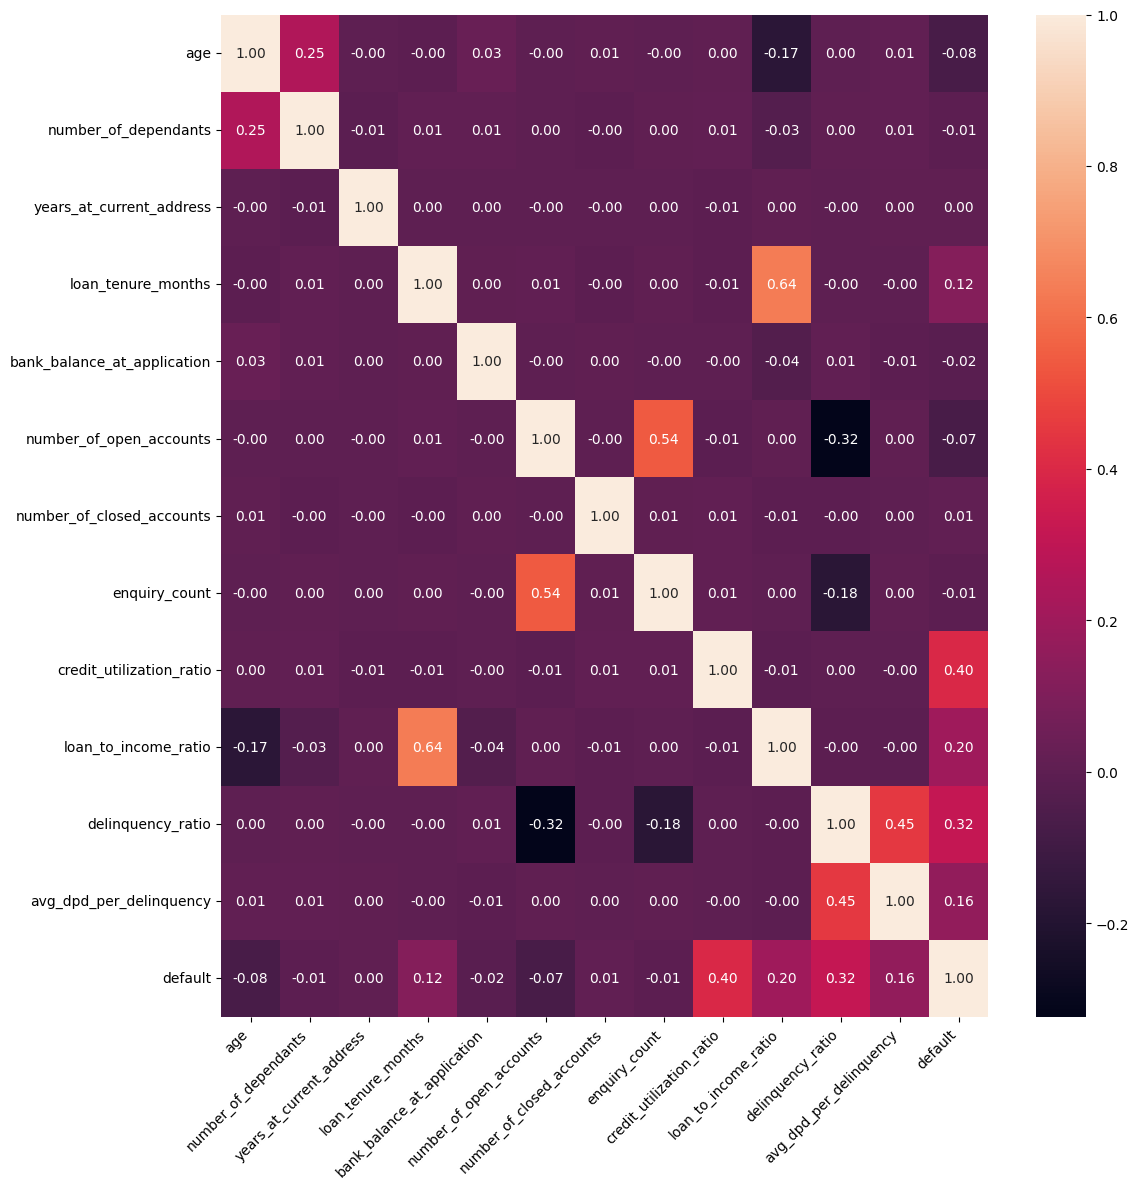

In [152]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Final Feature selection 

In [153]:
temp = pd.concat([X_train_1,y_train],axis=1)
temp.groupby('loan_purpose')['default'].agg(['count','sum'])

,count,sum
loan_purpose,,
Auto,7447,327
Education,5620,559
Home,11304,1734
Personal,13117,603


##### Weight of Evidence (WOE) and Information Value (IV)

In [154]:
def calculate_woe_iv(df,feature,target):
    result = df.groupby(feature)[target].agg(['count','sum'])
    result = result.rename(columns={'count':'total','sum':'good'})
    result['bad'] = result['total']-result['good']
    total_good = result['good'].sum()
    total_bad = result['bad'].sum()
    good_pct = result['good']/total_good
    bad_pct = result['bad']/total_bad
    result['woe'] = np.log(good_pct/bad_pct)
    result['iv'] = (good_pct-bad_pct) * result['woe']
    return result, result['iv'].sum()

df_woe_iv , total_iv = calculate_woe_iv(temp,'loan_purpose','default')
print(total_iv)
df_woe_iv

0.3691197842282755


,total,good,bad,woe,iv
loan_purpose,,,,,
Auto,7447,327,7120,-0.717,0.076
Education,5620,559,5061,0.161,0.004
Home,11304,1734,9570,0.656,0.170
Personal,13117,603,12514,-0.669,0.119


In [167]:
iv_values = {}

In [159]:
pd.cut(X_train_1['loan_to_income_ratio'],bins=10)

12746       (0.4, 0.5]
32495       (0.3, 0.4]
43675       (0.7, 0.8]
9040        (0.1, 0.2]
13077    (-0.001, 0.1]
             ...      
28515    (-0.001, 0.1]
5558        (0.1, 0.2]
45236       (0.7, 0.8]
49228       (0.2, 0.3]
37784       (0.1, 0.2]
Name: loan_to_income_ratio, Length: 37488, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [168]:
for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _,iv = calculate_woe_iv(temp,feature,'default')
    else:
        X_binned = pd.cut(X_train_1[feature],bins=10, labels=False)
        _,iv = calculate_woe_iv(pd.concat([X_binned,y_train],axis=1),feature,'default')
    iv_values[feature] = iv
iv_values

{'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.0019380899135053508),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'zipcode': np.float64(0.0019059578709781525),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'number_of_open_accounts': np.float64(0.08463134083005877),
 'number_of_closed_accounts': np.float64(0.0011964272592421567),
 'enquiry_count': np.float64(0.007864214085342608),
 'credit_utilization_ratio': np.float64(2.352965568168245),
 'loan_to_income_ratio': np.float64(0

In [169]:
iv_df = pd.DataFrame(list(cat_col_iv.items()),columns=['Feature','IV'])
iv_df = iv_df.sort_values(by='IV',ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.353
19,delinquency_ratio,0.713
18,loan_to_income_ratio,0.476
20,avg_dpd_per_delinquency,0.402
7,loan_purpose,0.369
3,residence_type,0.247
12,loan_tenure_months,0.219
8,loan_type,0.163
9,age,0.089
14,number_of_open_accounts,0.085


In [171]:
selected_features_iv = [feature for feature,iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income_ratio',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

### Feature Encoding

In [172]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [173]:
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income_ratio,delinquency_ratio,avg_dpd_per_delinquency
12746,0.788,Owned,Home,Secured,0.415,1.000,0.364,0.415,0.130,0.590
32495,0.500,Owned,Education,Secured,0.830,0.667,0.051,0.307,0.060,0.620
43675,0.385,Mortgage,Home,Secured,0.491,0.000,0.000,0.759,0.220,0.558
9040,0.462,Mortgage,Education,Secured,0.642,0.667,0.879,0.194,0.000,0.000
13077,0.769,Owned,Personal,Unsecured,0.170,0.000,0.717,0.047,0.000,0.000


In [178]:
X_train_encoded = pd.get_dummies(X_train_reduced,drop_first=True,dtype=int)
X_train_encoded

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income_ratio,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.130,0.590,1,0,0,1,0,0
32495,0.500,0.830,0.667,0.051,0.307,0.060,0.620,1,0,1,0,0,0
43675,0.385,0.491,0.000,0.000,0.759,0.220,0.558,0,0,0,1,0,0
9040,0.462,0.642,0.667,0.879,0.194,0.000,0.000,0,0,1,0,0,0
13077,0.769,0.170,0.000,0.717,0.047,0.000,0.000,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,1.000,0.113,0.333,0.131,0.063,0.000,0.000,1,0,0,0,1,1
5558,0.404,0.491,0.000,0.444,0.190,0.270,0.514,0,1,0,0,0,0
45236,0.404,0.604,1.000,0.980,0.719,0.080,0.400,1,0,0,1,0,0
49228,0.288,0.585,0.333,0.253,0.276,0.000,0.000,1,0,1,0,0,0


In [175]:
X_test_encoded = pd.get_dummies(X_test_reduced,drop_first=True,dtype=int)

<h3 align='center' style='color:blue'> Model Training </h3>

#### 1st Attempt 
1. Logistic Regression, Random Forest, XGBoost
2. No handeling of class imbalance

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded,y_train)

y_pred = model.predict(X_test_encoded)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



##### we aim for a recall > 90%

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(X_train_encoded,y_train)

y_pred = model.predict(X_test_encoded)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.86      0.70      0.77      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [181]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded,y_train)

y_pred = model.predict(X_test_encoded)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.82      0.76      0.79      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.87      0.88     12497
weighted avg       0.96      0.96      0.96     12497



#### 2nd Attempt 
1. Logistic Regression, Random Forest, XGBoost
2. With handeling of class imbalance - under sampling

In [183]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus,y_train_rus = rus.fit_resample(X_train_encoded,y_train)
y_train_rus.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_rus,y_train_rus)

y_pred = model.predict(X_test_encoded)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



##### recall improved but precision fell, this will increase the human review work as more positives(default=1) are predicted

In [185]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_rus,y_train_rus)

y_pred = model.predict(X_test_encoded)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11423
           1       0.55      0.95      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



#### 3rd Attempt 
1. Logistic Regression, Random Forest, XGBoost
2. With handeling of class imbalance - SMOTE Tomek

In [186]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt,y_train_smt = smt.fit_resample(X_train_encoded,y_train)
y_train_smt.value_counts()

default
0    34201
1    34201
Name: count, dtype: int64

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_smt,y_train_smt)

y_pred = model.predict(X_test_encoded)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



##### we got a good recall, which makes sure we dont miss anyone who is likely to default, so we are good 

### Fine Tuning

In [192]:
import optuna 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,f1_score

In [193]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True), #Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']), # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True), # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']) # Class weights
    }
    model = LogisticRegression(max_iter=10000)

    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)
    
study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-02-09 12:13:19,181] A new study created in memory with name: no-name-f606d8b2-b1f7-435f-baf3-c4804eb4cf04
[I 2025-02-09 12:13:36,553] Trial 0 finished with value: 0.9456996602679991 and parameters: {'C': 3382.621883212534, 'solver': 'saga', 'tol': 9.890562343975821e-05, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9456996602679991.
[I 2025-02-09 12:13:40,239] Trial 1 finished with value: 0.9456996602679991 and parameters: {'C': 0.00908475499175888, 'solver': 'saga', 'tol': 1.1446527001026536e-06, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9456996602679991.
[I 2025-02-09 12:13:43,688] Trial 2 finished with value: 0.9456996602679991 and parameters: {'C': 0.00889297500047885, 'solver': 'newton-cg', 'tol': 4.7117823195351725e-05, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9456996602679991.
[I 2025-02-09 12:13:44,158] Trial 3 finished with value: 0.9456996602679991 and parameters: {'C': 0.005439012544392197, 'solver': 'newton-cg', 'tol':

In [194]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9456996602679991
  Params: 
    C: 3382.621883212534
    solver: saga
    tol: 9.890562343975821e-05
    class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



#### After careful fine tuning, we proceed with best_model_logistic as out credit risk model.

In [198]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
probabilities 

array([0.51946248, 0.00000888, 0.00490361, ..., 0.00183527, 0.8454831 ,
       0.56892088], shape=(12497,))

In [201]:
from sklearn.metrics import roc_curve,auc

fpr, tpr, thresholds = roc_curve(y_test,probabilities)
tpr[:10]

array([0.        , 0.0009311 , 0.15735568, 0.15735568, 0.17597765,
       0.17597765, 0.21787709, 0.21787709, 0.22718808, 0.22718808])

In [202]:
area = auc(fpr,tpr)
area

np.float64(0.9835956923786193)

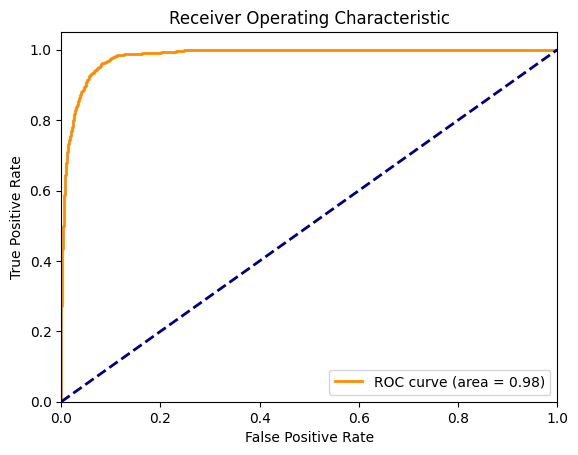

In [206]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

##### ROC Curve shows our model is a good model

#### Calculate KS Statistic

In [209]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
probabilities

array([0.51946248, 0.00000888, 0.00490361, ..., 0.00183527, 0.8454831 ,
       0.56892088], shape=(12497,))

In [217]:
df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
19205,0,0.519
15514,0,0.000
30367,0,0.005


In [218]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'],10,labels=False,duplicates="drop")
df_eval.head(3)

,Default Truth,Default Probability,Decile
19205,0,0.519,8
15514,0,0.000,2
30367,0,0.005,6


In [219]:
df_grouped = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(), 
}))
df_grouped.reset_index(inplace=True)
df_grouped

C:\Users\shravan pattan\AppData\Local\Temp\ipykernel_2212\2542285660.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1249.000
3,3,0.000,0.000,0.000,1250.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.004,0.000,1249.000
6,6,0.004,0.026,5.000,1245.000
7,7,0.026,0.205,10.000,1239.000
8,8,0.205,0.822,161.000,1089.000
9,9,0.823,1.000,898.000,352.000


In [220]:
df_grouped['Event Rate'] = df_grouped['Events']*100 / (df_grouped['Events']+df_grouped['Non-events'])
df_grouped['Non-event Rate'] = df_grouped['Non-events']*100 / (df_grouped['Events']+df_grouped ['Non-events'])
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1249.000,0.000,100.000
3,3,0.000,0.000,0.000,1250.000,0.000,100.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
5,5,0.001,0.004,0.000,1249.000,0.000,100.000
6,6,0.004,0.026,5.000,1245.000,0.400,99.600
7,7,0.026,0.205,10.000,1239.000,0.801,99.199
8,8,0.205,0.822,161.000,1089.000,12.880,87.120
9,9,0.823,1.000,898.000,352.000,71.840,28.160


In [223]:
df_grouped = df_grouped.sort_values(by='Decile',ascending=False).reset_index(drop=True)
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.823,1.000,898.000,352.000,71.840,28.160
1,8,0.205,0.822,161.000,1089.000,12.880,87.120
2,7,0.026,0.205,10.000,1239.000,0.801,99.199
3,6,0.004,0.026,5.000,1245.000,0.400,99.600
4,5,0.001,0.004,0.000,1249.000,0.000,100.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [226]:
df_grouped ['Cum Events'] = df_grouped ['Events'].cumsum()
df_grouped ['Cum Non-events'] = df_grouped ['Non-events'].cumsum()
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.823,1.000,898.000,352.000,71.840,28.160,898.000,352.000
1,8,0.205,0.822,161.000,1089.000,12.880,87.120,1059.000,1441.000
2,7,0.026,0.205,10.000,1239.000,0.801,99.199,1069.000,2680.000
3,6,0.004,0.026,5.000,1245.000,0.400,99.600,1074.000,3925.000
4,5,0.001,0.004,0.000,1249.000,0.000,100.000,1074.000,5174.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000


In [228]:
df_grouped['Cum Event Rate'] = df_grouped['Cum Events']* 100 / df_grouped['Events'].sum()
df_grouped['Cum Non-event Rate'] = df_grouped['Cum Non-events']*100 / df_grouped['Non-events'].sum()
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.823,1.000,898.000,352.000,71.840,28.160,898.000,352.000,83.613,3.082
1,8,0.205,0.822,161.000,1089.000,12.880,87.120,1059.000,1441.000,98.603,12.615
2,7,0.026,0.205,10.000,1239.000,0.801,99.199,1069.000,2680.000,99.534,23.461
3,6,0.004,0.026,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361
4,5,0.001,0.004,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000


In [229]:
df_grouped['KS'] = abs(df_grouped['Cum Event Rate'] - df_grouped['Cum Non-event Rate'])
df_grouped

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.823,1.000,898.000,352.000,71.840,28.160,898.000,352.000,83.613,3.082,80.531
1,8,0.205,0.822,161.000,1089.000,12.880,87.120,1059.000,1441.000,98.603,12.615,85.988
2,7,0.026,0.205,10.000,1239.000,0.801,99.199,1069.000,2680.000,99.534,23.461,76.073
3,6,0.004,0.026,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361,65.639
4,5,0.001,0.004,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295,54.705
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237,43.763
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180,32.820
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114,21.886
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057,10.943
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000,0.000


Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.


* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.
* 
The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

#### Gini Coefficient

In [231]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9835956923786193
Gini Coefficient: 0.9671913847572386


The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

### Finalize The Model and Visualize Feature Importance

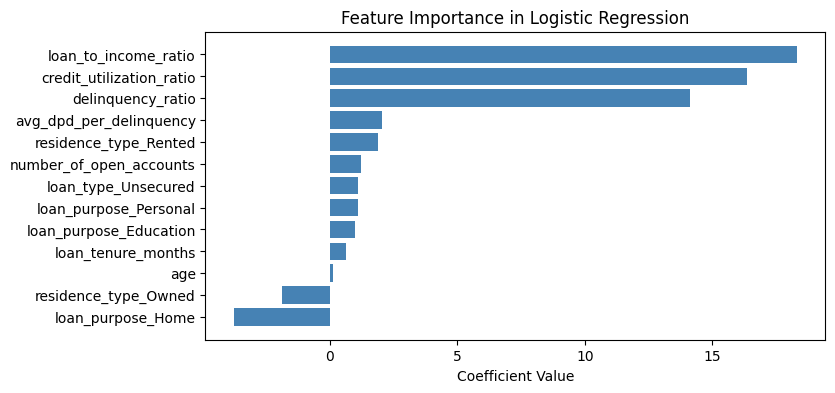

In [232]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [233]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income_ratio', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [234]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income_ratio', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [235]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income_ratio', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [236]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']

In [237]:
final_model.coef_, final_model.intercept_

(array([[ 0.11267429,  0.62970407,  1.22438897, 16.34703047, 18.33619047,
         14.11480769,  2.05843749, -1.87921631,  1.89709853,  0.97262836,
         -3.77157209,  1.10377891,  1.10377891]]),
 array([-21.46695796]))